# Setup

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [8]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [ ]:
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)
scaler_test_all_indices = StandardScaler()
X_test_all_indices_scaled = scaler_test_all_indices.fit_transform(X_test_all_indices)
scaler_test_selected_indices = StandardScaler()
X_test_selected_indices_scaled = scaler_test_selected_indices.fit_transform(X_test_selected_indices)

In [3]:
linear_regression_10_bands = load('../models/linear_regression_10_bands.joblib')
linear_regression_all_bands = load('../models/linear_regression_all_bands.joblib')
linear_regression_selected_bands = load('../models/linear_regression_selected_bands.joblib')
knn_10_bands = load('../models/knn_10_bands.joblib')
knn_all_bands = load('../models/knn_all_bands.joblib')
knn_selected_bands = load('../models/knn_selected_bands.joblib')
decision_tree_10_bands = load('../models/decision_tree_10_bands.joblib')
decision_tree_all_bands = load('../models/decision_tree_all_bands.joblib')
decision_tree_selected_bands = load('../models/decision_tree_selected_bands.joblib')
random_forest = load('../models/random_forest.joblib')
extra_trees = load('../models/extra_trees.joblib')
xgboost = load('../models/xgboost.joblib')
# mlp = load('../models/mlp.joblib') # TODO!
# cnn = load('../models/cnn.joblib') # TODO!

# Compute and Visualize the Mean Absolute Error

In [9]:
y_pred_linear_regression_10_bands = linear_regression_10_bands.predict(X_test)
y_pred_linear_regreesion_all_bands = linear_regression_all_bands.predict(X_test_all_indices)
y_pred_linear_regression_selected_bands = linear_regression_selected_bands.predict(X_test_selected_indices)
y_pred_knn_10_bands = knn_10_bands.predict(X_test_scaled)
y_pred_knn_all_bands = knn_all_bands.predict(X_test_all_indices_scaled)
y_pred_knn_selected_bands = knn_selected_bands.predict(X_test_selected_indices_scaled)
y_pred_decision_tree_10_bands = decision_tree_10_bands.predict(X_test)
y_pred_decision_tree_all_bands = decision_tree_all_bands.predict(X_test_all_indices)
y_pred_decision_tree_selected_bands = decision_tree_selected_bands.predict(X_test_selected_indices)
y_pred_random_forest = random_forest.predict(X_test_all_indices)
y_pred_extra_trees = extra_trees.predict(X_test_all_indices)
y_pred_xgboost = xgboost.predict(X_test_all_indices)

In [17]:
model_predictions = [
    (y_pred_linear_regression_10_bands, 'Linear Regression (10 bands)', '#1f77b4'),
    (y_pred_linear_regreesion_all_bands, 'Linear Regression (all bands)', '#1f77b4'),
    (y_pred_linear_regression_selected_bands, 'Linear Regression (selected bands)', '#1f77b4'),
    (y_pred_knn_10_bands, 'KNN (10 bands)', '#ff7f0e'),
    (y_pred_knn_all_bands, 'KNN (all bands)', '#ff7f0e'),
    (y_pred_knn_selected_bands, 'KNN (selected bands)', '#ff7f0e'),
    (y_pred_decision_tree_10_bands, 'Decision Tree (10 bands)', '#2ca02c'),
    (y_pred_decision_tree_all_bands, 'Decision Tree (all bands)', '#2ca02c'),
    (y_pred_decision_tree_selected_bands, 'Decision Tree (selected bands)', '#2ca02c'),
    (y_pred_random_forest, 'Random Forest', '#d62728'),
    (y_pred_extra_trees, 'Extra Trees', '#e377c2'),
    (y_pred_xgboost, 'XGBoost', '#9467bd')
]

errors = [mean_absolute_error(y_test, pred) for pred, _, _ in model_predictions]
labels = [label for _, label, _ in model_predictions]
colors = [color for _, _, color in model_predictions]

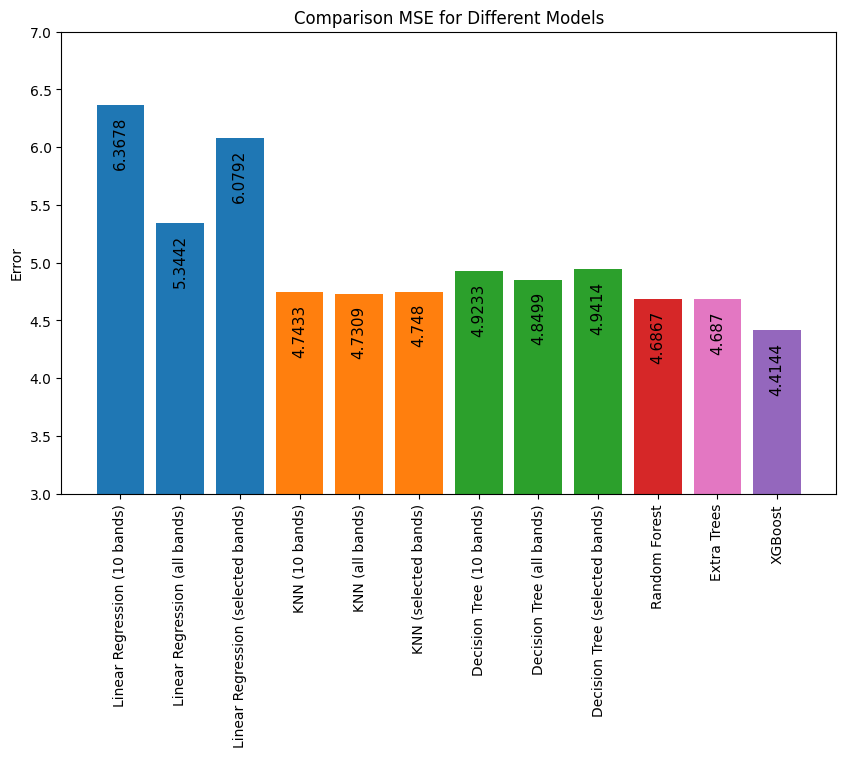

In [46]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(labels, errors, color=colors)
plt.ylabel('Error')
plt.title('Comparison MSE for Different Models')
plt.xticks(rotation=90)
plt.yticks(np.arange(3, 8, 0.5))
plt.ylim([3, 7])

for bar in bar_plot:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             round(bar.get_height(), 4),
             ha='center', va='top', fontsize=11, rotation=90)

plt.show()